<a href="https://colab.research.google.com/github/tontantip/DADS6001-Applied-statistics/blob/main/code%20/final_project/Source_code_final_project_2_DADS6001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
water <- c(1.412, 0.890, 1.122, 1.082, 0.694, 0.758, 1.041)
LiC   <- c(0.806, 1.037, 0.859, 0.958, 1.137, 1.171, 1.186, 0.902)
LiO   <- c(0.542, 0.604, 0.453, 0.609, 0.470, 0.535, 0.754, 0.539)

In [ ]:
%%R
df <- data.frame(
  group = factor(rep(c("3xTg/water", "3xTg/LiC", "3xTg/LiO"),
                     times = c(length(water), length(LiC), length(LiO)))),
  MBP = c(water, LiC, LiO)
)

In [ ]:
%%R
fit <- aov(MBP ~ group, data = df)

In [ ]:
%%R
shapiro.test(water)



	Shapiro-Wilk normality test

data:  water
W = 0.95702, p-value = 0.7928



In [ ]:
%%R
shapiro.test(LiC)


	Shapiro-Wilk normality test

data:  LiC
W = 0.9185, p-value = 0.4178



In [ ]:
%%R
shapiro.test(LiO)


	Shapiro-Wilk normality test

data:  LiO
W = 0.90417, p-value = 0.3148



In [ ]:
%%R
shapiro.test(residuals(fit))


	Shapiro-Wilk normality test

data:  residuals(fit)
W = 0.97927, p-value = 0.8933



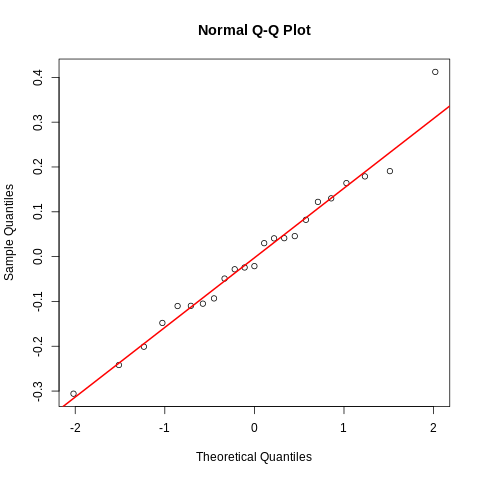

In [ ]:
%%R
qqnorm(residuals(fit))
qqline(residuals(fit), col = "red", lwd = 2)

In [ ]:
%%R
install.packages("car", repos = "https://cloud.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘forecast’, ‘doBy’, ‘pbkrtest’

trying URL 'https://cloud.r-project.org/src/contrib/forecast_8.24.0.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/doBy_4.7.1.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/pbkrtest_0.5.5.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/car_3.1-3.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmp7Av05B/downloaded_packages’
In addition: Warning messages:
1: In install.packages("car", repos = "https://cloud.r-project.org") :
  installation of package ‘forecast’ had non-zero exit status
2: In install.packages("car", repos = "https://cloud.r-project.org") :
  installation of package ‘doBy’ had non-zero exit status
3: In install.packages("car", repos = "https://cloud.r-project.org") :
  installation of package ‘pbkrtest’ had non-zero exit status
4: In install.packages("car", repos = "https://cloud.r-pr

In [ ]:
%%R
library(car)

Error in library(car) : there is no package called ‘car’


RInterpreterError: Failed to parse and evaluate line 'library(car)\n'.
R error message: 'Error in library(car) : there is no package called ‘car’'

In [ ]:
%%R
leveneTest(MBP ~ group, data = df)

Error in leveneTest(MBP ~ group, data = df) : 
  could not find function "leveneTest"


RInterpreterError: Failed to parse and evaluate line 'leveneTest(MBP ~ group, data = df)\n'.
R error message: 'Error in leveneTest(MBP ~ group, data = df) : \n  could not find function "leveneTest"'

In [ ]:
%%R
fit <- aov(MBP ~ group, data = df)

In [ ]:
%%R
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2 1.0122  0.5061   17.68 3.79e-05 ***
Residuals   20 0.5726  0.0286                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
tukey <- TukeyHSD(fit)

In [ ]:
%%R
tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = MBP ~ group, data = df)

$group
                            diff        lwr        upr     p adj
3xTg/LiO-3xTg/LiC   -0.443750000 -0.6577968 -0.2297032 0.0001117
3xTg/water-3xTg/LiC -0.007142857 -0.2287024  0.2144167 0.9963396
3xTg/water-3xTg/LiO  0.436607143  0.2150476  0.6581667 0.0002015

